In [1]:
#imports

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing, linear_model, tree, metrics
import graphviz 
from scipy.io import arff
import pydot

import pickle
import seaborn as sns

The dataset is from Kaggle website. It contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

# Data Exploration

In [2]:
#Loading the data from csv
raw_data = pd.read_csv('movie_metadata.csv', encoding = "utf-8")

In [3]:
#Visualising Data
raw_data.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
#Data Shape
raw_data.shape

(5043, 28)

# Data Cleaning

In [5]:
#Removing Duplicates
raw_data.drop_duplicates(keep = False, inplace = True)
raw_data.shape

(4953, 28)

In [6]:
#Total missing values for each feature
raw_data.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        48
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        864
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                151
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               299
budget                       482
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 325
movie_facebook_likes           0
dtype: int64

gross, budget, aspect_ratio and content_rating have the most number of missing values but we need these features in our following analysis so we're deleting the rows with the messing values for content_rating and replacing the missing values in the others with the mean

In [7]:
#Deleting rows with missing values for content_rating
raw_data.dropna(axis=0, how='any', thresh=None, subset=['content_rating'], inplace=True)
raw_data.shape

(4654, 28)

In [8]:
#Replacing missing values with mean of column
#for gross
gross_median = raw_data['gross'].mean()
raw_data['gross'].fillna(gross_median, inplace=True)
#for budget
budget_median = raw_data['budget'].mean()
raw_data['budget'].fillna(budget_median, inplace=True)

In [9]:
#Analysing aspect_ratrio
#replacing NA values with 0s
raw_data['aspect_ratio'].fillna(0,inplace=True)
raw_data['aspect_ratio']

0        1.78
1        2.35
2        2.35
3        2.35
5        2.35
6        2.35
7        1.85
8        2.35
9        2.35
10       2.35
11       2.35
12       2.35
13       2.35
14       2.35
15       2.35
16       2.35
18       2.35
19       1.85
20       2.35
21       2.35
22       2.35
23       2.35
24       2.35
25       2.35
26       2.35
27       2.35
28       2.35
29       2.00
30       2.35
31       2.35
        ...  
4995    16.00
4997     2.35
4998     1.85
5000     2.35
5001     1.85
5003     0.00
5004     2.35
5005     1.66
5006     0.00
5007     0.00
5008     1.37
5009     1.37
5011     1.85
5012     1.85
5014     2.35
5015     1.37
5019     1.85
5021     0.00
5024     2.35
5025     1.37
5026     2.35
5027     1.85
5033     1.85
5034     0.00
5035     1.37
5036     0.00
5037     0.00
5039    16.00
5041     2.35
5042     1.85
Name: aspect_ratio, Length: 4654, dtype: float64

In [10]:
#1.85 and 2.35 are the most common values
#Calculating the mean of imdb_score for aspect_ration 1.85
np.mean(raw_data.imdb_score[raw_data.aspect_ratio == 1.85])

6.356792144026187

In [11]:
#Calculating the mean of imdb_score for aspect_ration 1.85
np.mean(raw_data.imdb_score[raw_data.aspect_ratio == 2.35])

6.489681133746679

In [12]:
#Calculating the mean of imdb_score for aspect_ration the rest of the values
np.mean(raw_data.imdb_score[raw_data.aspect_ratio != 2.35][raw_data.aspect_ratio != 1.85])

6.532859680284192

The mean of imbd_score for aspect_ratio is almost the same for the different values so we're removing this predictor

In [13]:
#Dropping aspect_ratio
raw_data.drop(['aspect_ratio'], axis=1, inplace=True)
raw_data.shape

(4654, 27)

Removing Columns

In [18]:
#Analysing the feature color
raw_data['color'].value_counts()

Color               4451
 Black and White     190
Name: color, dtype: int64

We're removing this predictor since most of its values are colors and it can be considerd as constant

In [19]:
#Dropping color
raw_data.drop(['color'], axis=1, inplace=True)
raw_data.shape

(4654, 26)

In [20]:
#Analysing the feature language
raw_data['language'].value_counts()

English       4409
French          51
Spanish         36
Mandarin        18
Hindi           15
German          15
Japanese        13
Italian          9
Portuguese       8
Cantonese        8
Russian          7
Korean           7
Danish           5
Hebrew           4
Persian          4
Norwegian        4
Polish           3
Dutch            3
Thai             3
Indonesian       2
None             2
Zulu             2
Dari             2
Aboriginal       2
Arabic           2
Swedish          2
Greek            1
Vietnamese       1
Mongolian        1
Chinese          1
Romanian         1
Filipino         1
Kazakh           1
Aramaic          1
Maya             1
Hungarian        1
Czech            1
Bosnian          1
Name: language, dtype: int64

We're removing the language since most of them are english and its almost constant also.

In [21]:
#Dropping language
raw_data.drop(['language'], axis=1, inplace=True)
raw_data.shape

(4654, 25)

In [22]:
#The movie_imdb_link and the movie title are unnecessary for the prediction so we're removing them
#Dropping movie_imdb_link
raw_data.drop(['movie_imdb_link'], axis=1, inplace=True)
#Dropping movie_title
raw_data.drop(['movie_title'], axis=1, inplace=True)
raw_data.shape

(4654, 23)

In [23]:
#The number of critics for reviews, number of users for reviews, the number of users who voted
#and plot_keyword are also irrelevant

#Dropping num_critic_for_reviews
raw_data.drop(['num_critic_for_reviews'], axis=1, inplace=True)
#Dropping num_user_for_reviews
raw_data.drop(['num_user_for_reviews'], axis=1, inplace=True)
#Dropping num_voted_users
raw_data.drop(['num_voted_users'], axis=1, inplace=True)
#Dropping plot_keywords
raw_data.drop(['plot_keywords'], axis=1, inplace=True)
raw_data.shape

(4654, 19)

In [24]:
raw_data.isnull().sum()

director_name                64
duration                      3
director_facebook_likes      64
actor_3_facebook_likes        9
actor_2_name                  2
actor_1_facebook_likes        1
gross                         0
genres                        0
actor_1_name                  1
cast_total_facebook_likes     0
actor_3_name                  9
facenumber_in_poster         12
country                       2
content_rating                0
budget                        0
title_year                   64
actor_2_facebook_likes        2
imdb_score                    0
movie_facebook_likes          0
dtype: int64

We cannot replace the missing values of title_year with the average of the column and neither is it usefull to replace those of the director name so we're deleting those rows

In [33]:
#Deleting rows with missing values for title_year
raw_data.dropna(axis=0, how='any', thresh=None, subset=['title_year'], inplace=True)
raw_data.shape

(4590, 19)

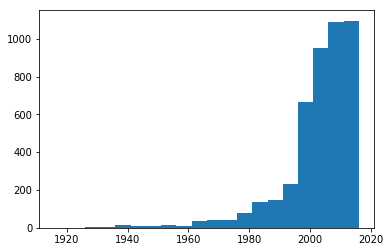

In [34]:
#Analysing the title_year
plt.hist(raw_data['title_year'],bins=20)
plt.show()

We're removing the records before 1980 as there aren't many of them

In [35]:
#Removing the records before 1980
raw_data = raw_data[raw_data.title_year >= 1980]
raw_data.shape

(4341, 19)

In [36]:
#Deleting rows with missing values for director_name
raw_data.dropna(axis=0, how='any', thresh=None, subset=['director_name'], inplace=True)
raw_data.shape

(4341, 19)

In [37]:
#Replacing NA values in facenumber_in_poster with average
average = round(raw_data['facenumber_in_poster'].mean()) 
raw_data['facenumber_in_poster'].fillna(average,inplace=True)

In [38]:
raw_data.isnull().sum()

director_name                0
duration                     2
director_facebook_likes      0
actor_3_facebook_likes       7
actor_2_name                 2
actor_1_facebook_likes       1
gross                        0
genres                       0
actor_1_name                 1
cast_total_facebook_likes    0
actor_3_name                 7
facenumber_in_poster         0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       2
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [39]:
#Deleting the rest of rows with messing values
raw_data.dropna(axis=0, how='any', thresh=None, subset=['duration','actor_2_name','actor_1_name','actor_3_name'], inplace=True)
raw_data.shape

(4333, 19)

In [40]:
raw_data.isnull().sum().sum() #No more missing data

0

# Data PreProcessing

In [42]:
#Analysing the director_name feature
raw_data['director_name'].unique().shape

(2056,)

There are 2056 different unique director name in a 4333 sized dataset so it'll be unuseful to keep this feature 

In [43]:
#Dropping director_name
raw_data.drop(['director_name'], axis=1, inplace=True)
raw_data.shape

(4333, 18)

In [46]:
#Analysing actor names
actors.clear()
actors = raw_data['actor_1_name'].unique().tolist()
len(actors)

1720

In [47]:
actors.extend(raw_data['actor_2_name'].unique().tolist())
len(actors)

4269

In [48]:
actors.extend(raw_data['actor_3_name'].unique().tolist())
len(actors)

7300

In [49]:
unique_actors = set(actors)
len(unique_actors)

5192

We'll be removing the actors names as they are too different and we can use their facebook likes instead

In [50]:
#Dropping actors names
#Dropping actor_1_name
raw_data.drop(['actor_1_name'], axis=1, inplace=True)
#Dropping actor_2_name
raw_data.drop(['actor_2_name'], axis=1, inplace=True)
#Dropping actor_1_name
raw_data.drop(['actor_3_name'], axis=1, inplace=True)

raw_data.shape

(4333, 15)

In [51]:
#Dropping gross
raw_data.drop(['gross'], axis=1, inplace=True)

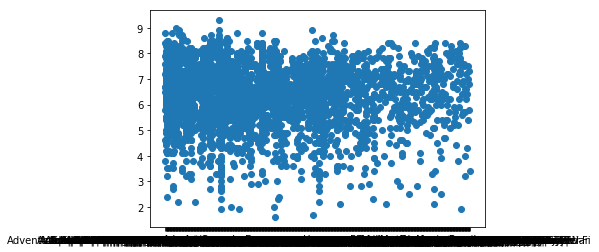

In [52]:
#Analysing the genre 
plt.scatter(raw_data['genres'], raw_data.imdb_score)
plt.show()

In [53]:
#Dropping genres
raw_data.drop(['genres'], axis=1, inplace=True)

Removing highly correlated variables

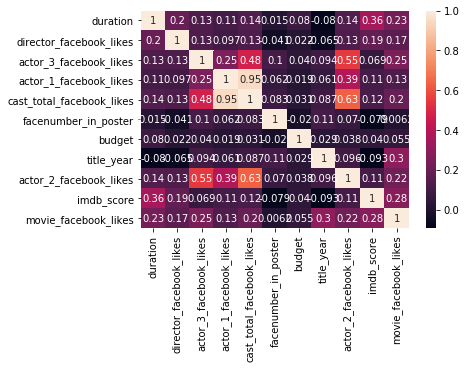

In [54]:
Var_Corr = raw_data.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()

Cast_total_facebook_likes is highly correlated with actor_1_facebook_likes, actor_2_facebook_likes and actor_3_facebook_likes. We'll be removing the latter 3 predictors.

In [55]:
#Dropping actor_1_facebook_likes
raw_data.drop(['actor_1_facebook_likes'], axis=1, inplace=True)
#Dropping actor_2_facebook_likes
raw_data.drop(['actor_2_facebook_likes'], axis=1, inplace=True)
#Dropping actor_3_facebook_likes
raw_data.drop(['actor_3_facebook_likes'], axis=1, inplace=True)
raw_data.shape

(4333, 10)

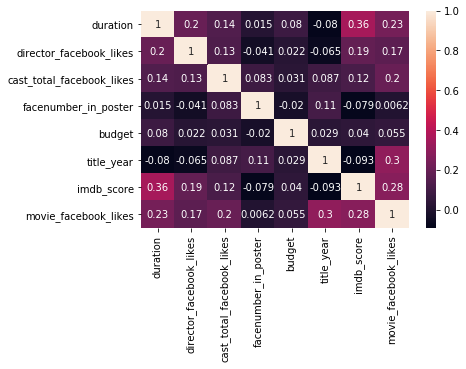

In [56]:
Var_Corr = raw_data.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()

There are no more highly correlated variables

In [57]:
raw_data.head()

,duration,director_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,178.0,0.0,4834,0.0,USA,PG-13,237000000.0,2009.0,7.9,33000
1,169.0,563.0,48350,0.0,USA,PG-13,300000000.0,2007.0,7.1,0
2,148.0,0.0,11700,1.0,UK,PG-13,245000000.0,2015.0,6.8,85000
3,164.0,22000.0,106759,0.0,USA,PG-13,250000000.0,2012.0,8.5,164000
5,132.0,475.0,1873,1.0,USA,PG-13,263700000.0,2012.0,6.6,24000


Replace 0s with median in director_facebook_likes, cast_total_facebook_likes,facenumber_in_poster and movie_facebook_likes

In [58]:
#Replace 0z with median for cast_total_facebook_likes
non_zero_cast_fb_likes = raw_data[raw_data.cast_total_facebook_likes != 0]
cast_fb_likes_median = round(non_zero_cast_fb_likes.cast_total_facebook_likes.median())
raw_data.cast_total_facebook_likes.replace(to_replace=[0],value=cast_fb_likes_median,inplace=True)

In [59]:
#Replace 0z with median for director_facebook_likes
non_zero_director_fb_likes = raw_data[raw_data.director_facebook_likes != 0]
director_fb_likes_median = round(non_zero_director_fb_likes.director_facebook_likes.median())
raw_data.director_facebook_likes.replace(to_replace=[0],value=director_fb_likes_median,inplace=True)

In [60]:
#Replace 0z with median for movie_facebook_likes
non_zero_movie_fb_likes = raw_data[raw_data.movie_facebook_likes != 0]
movie_fb_likes_median = round(non_zero_movie_fb_likes.movie_facebook_likes.median())
raw_data.movie_facebook_likes.replace(to_replace=[0],value=movie_fb_likes_median,inplace=True)

In [62]:
#Analysing the country predictor
raw_data['country'].value_counts()

USA                   3334
UK                     370
France                 126
Canada                 107
Germany                 89
Australia               50
Spain                   32
China                   17
Japan                   16
Hong Kong               16
Mexico                  15
India                   14
New Zealand             13
Italy                   12
Ireland                 11
South Korea             11
Denmark                 10
South Africa             8
Brazil                   7
Russia                   7
Norway                   7
Thailand                 5
Netherlands              4
Argentina                4
Czech Republic           3
Romania                  3
Iran                     3
Belgium                  3
Israel                   3
Taiwan                   2
West Germany             2
Sweden                   2
Hungary                  2
Poland                   2
Greece                   2
Afghanistan              1
Georgia                  1
B

In [63]:
#Reducing the number of values for country
country_list=raw_data['country'].unique()
to_keep_country_list = np.array(['USA','UK'])
country_list = np.setdiff1d(country_list,to_keep_country_list)
raw_data.country.replace(to_replace=country_list,value='other',inplace=True)
raw_data['country'].value_counts()

USA      3334
other     629
UK        370
Name: country, dtype: int64

In [64]:
#Analysing the content_rating predictor
raw_data['content_rating'].value_counts()

R            2035
PG-13        1421
PG            634
Not Rated      88
G              88
Unrated        42
X              10
NC-17           6
TV-14           3
TV-PG           3
TV-G            3
Name: content_rating, dtype: int64

In [65]:
#Reducing the number of values for content_rating
rating_list=raw_data['content_rating'].unique()
to_keep_rating_list = np.array(['R','PG-13','PG'])
rating_list = np.setdiff1d(rating_list,to_keep_rating_list)
raw_data.content_rating.replace(to_replace=rating_list,value='other',inplace=True)
raw_data['content_rating'].value_counts()

R        2035
PG-13    1421
PG        634
other     243
Name: content_rating, dtype: int64

Binarising the non numeric variables

In [66]:
#Binarising country
countries = raw_data['country'].unique()
countries
raw_data.country.replace(to_replace=countries,value=[0,1,2],inplace=True)

In [67]:
#Binarising content_rating
ratings = raw_data['content_rating'].unique()
raw_data.content_rating.replace(to_replace=ratings,value=[0,1,2,3],inplace=True)

In [68]:
#Breaking the score into 4 buckets
scores = raw_data['imdb_score'].tolist()
count_table = list()
for score in scores:
    count = 0
    if score < 2:
        count =0
    elif score < 4:
        count=1
    elif score < 6:
        count=2
    elif score < 8:
        count=3
    else:
        count=4
    count_table.append(count)
#replacing
raw_data.imdb_score.replace(to_replace=scores,value=count_table,inplace=True)

In [69]:
raw_data.head(20)

,duration,director_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,178.0,82.0,4834,0.0,0,0,237000000.0,2009.0,3.0,33000
1,169.0,563.0,48350,0.0,0,0,300000000.0,2007.0,3.0,2000
2,148.0,82.0,11700,1.0,1,0,245000000.0,2015.0,3.0,85000
3,164.0,22000.0,106759,0.0,0,0,250000000.0,2012.0,4.0,164000
5,132.0,475.0,1873,1.0,0,0,263700000.0,2012.0,3.0,24000
6,156.0,82.0,46055,0.0,0,0,258000000.0,2007.0,3.0,2000
7,100.0,15.0,2036,1.0,0,1,260000000.0,2010.0,3.0,29000
8,141.0,82.0,92000,4.0,0,0,250000000.0,2015.0,3.0,118000
9,153.0,282.0,58753,3.0,1,1,250000000.0,2009.0,3.0,10000
10,183.0,82.0,24450,0.0,0,0,250000000.0,2016.0,3.0,197000


In [74]:
#Rearranging the dataset
raw_data =  raw_data[['title_year', 'country', 'duration',
                      'content_rating', 'budget', 'facenumber_in_poster',
                      'director_facebook_likes', 'cast_total_facebook_likes',
                       'movie_facebook_likes', 'imdb_score']]
raw_data.shape

(4333, 10)

Split Data

In [76]:
#Seperating the target variable 
x = raw_data.drop(columns=['imdb_score'])
y= raw_data['imdb_score'].values

In [77]:
#Creating training and testing vars
x_train ,x_test , y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=7)

# Algorithms Implementation

In this part we'll be trying out some different algorithms.
The algorithm to choose for the prediction of the score will be based on the degree of its precision.

Linear Regression

In [78]:
#Fitting
lm = LinearRegression()
model=lm.fit(x_train,y_train)

In [79]:
#Predicting
y_pred=model.predict(x_test)
print(y_pred)

[2.79609304 2.76855477 2.52948465 ... 2.78817148 2.90468983 2.49250907]


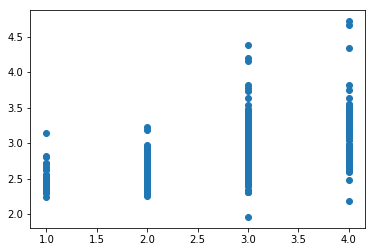

In [80]:
#Plotting
plt.scatter(y_test,y_pred)
plt.show()

In [81]:
#Measuring metrics
print ("Accuracy : ", lm.score(x,y))
#The coefficients
print('Coefficients : \n', lm.coef_)
# The mean squared error
print("Mean squared error :", mean_squared_error(y_test, y_pred))
# Explained variance score:
print('Variance score : ', r2_score(y_test, y_pred))

Accuracy :  0.1868529446691075
Coefficients : 
 [-8.90139682e-03  6.43333144e-02  6.72890392e-03  4.26116588e-02
  2.08403711e-11 -1.93890434e-02  1.42743724e-05  1.44995177e-06
  7.02784820e-06]
Mean squared error : 0.2937704683582949
Variance score :  0.20531915228394615


Decision Tree

In [83]:
#Fitting
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
modelDt=clf.fit(x_train, y_train)

In [84]:
#Predicting
y_predDt=modelDt.predict(x_test)

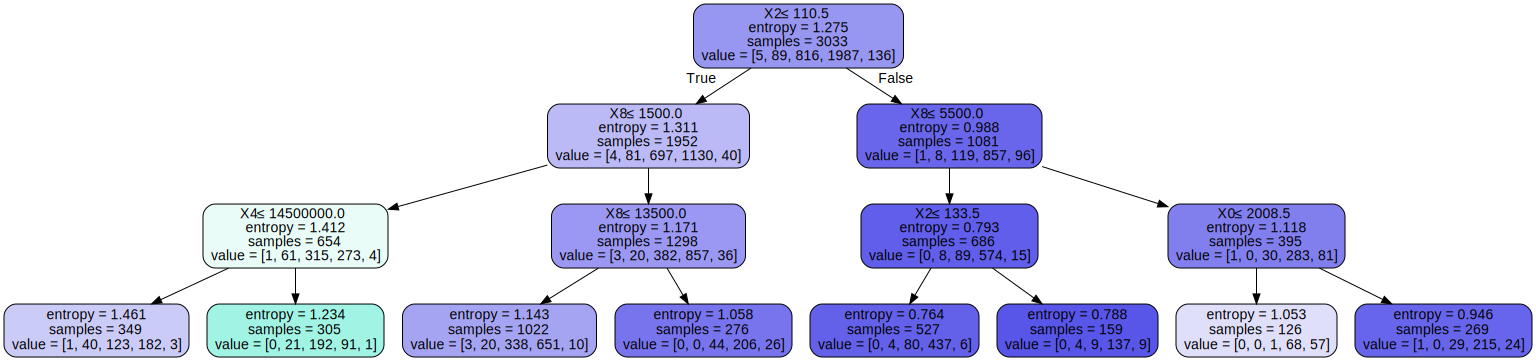

In [85]:
#Plotting the tree
dot_data = tree.export_graphviz(clf, out_file=None,  
                     filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)
graph

In [86]:
#Measuring metrics
print ("Accuracy : ", accuracy_score(y_test,y_predDt))
print(f"Cross Val : ", np.mean(cross_val_score(clf, x, y, cv=5, scoring='accuracy')))

print("Confusion Matrix: ") 
pd.crosstab(y_test, y_predDt, rownames=['Actual Result'], colnames=['Predicted Result'])

Accuracy :  0.6730769230769231
Cross Val :  0.6493404054926735
Confusion Matrix: 


Predicted Result,2.0,3.0
Actual Result,,
1.0,13,27
2.0,89,280
3.0,40,786
4.0,1,64


Random Forest

In [88]:
#Fitting
rf = RandomForestClassifier(criterion='entropy', max_features=0.5, min_samples_leaf=3, n_jobs=2, random_state=0, n_estimators=200)
modelRf=rf.fit(x_train, y_train)

In [89]:
#Predicting
y_predRf=modelRf.predict(x_test)

In [90]:
#Pulling out one tree from the forest
one_tree = rf.estimators_[5]

In [91]:
#Exporting the image to a dot file
tree.export_graphviz(one_tree, out_file = 'tree.dot', rounded = True, precision = 1)

In [92]:
#Using dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [93]:
#Writing te graph to a png file
graph.write_png('tree.png')

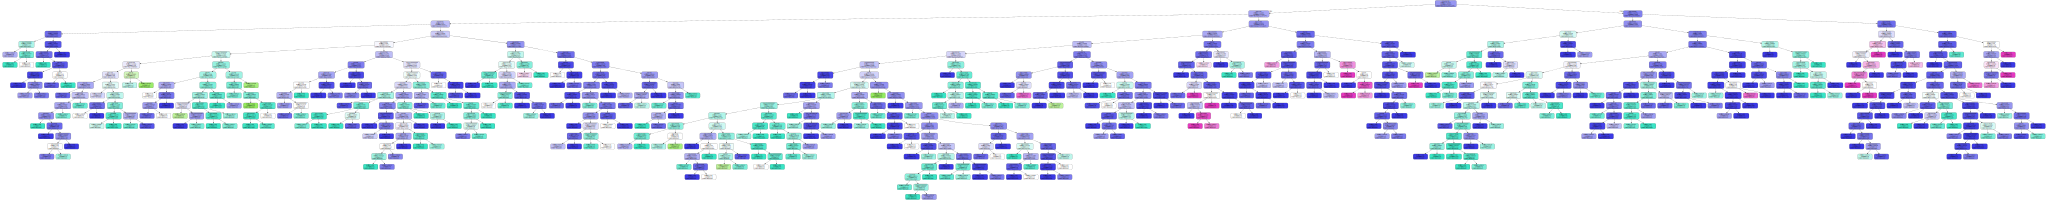

In [94]:
#Plotting a graph
dot_data = tree.export_graphviz(one_tree, out_file=None,  
                     filled=True, rounded=True,  
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [95]:
#Measuring metrics
print ("Accuracy : ", accuracy_score(y_test,y_predRf))
print(f"Cross Val : ", np.mean(cross_val_score(rf, x, y, cv=5, scoring='accuracy')))

print("Confusion Matrix: ") 
pd.crosstab(y_test, y_predRf, rownames=['Actual Result'], colnames=['Predicted Result'])

Accuracy :  0.7138461538461538
Cross Val :  0.6805166689797261
Confusion Matrix: 


Predicted Result,1.0,2.0,3.0,4.0
Actual Result,,,,
1.0,0,14,26,0
2.0,3,146,220,0
3.0,0,56,763,7
4.0,0,0,46,19


KNN

In [96]:
#Fitting
kn=KNeighborsClassifier(n_jobs=7)
modelKn= kn.fit(x_train, y_train)

In [97]:
#Predicting
y_predKn=modelKn.predict(x_test)

In [98]:
#Measuring metrics
print ("Accuracy : ", accuracy_score(y_test,y_predKn))
print(f"Cross Val : ", np.mean(cross_val_score(kn, x, y, cv=5, scoring='accuracy')))

print("Confusion Matrix: ") 
pd.crosstab(y_test, y_predKn, rownames=['Actual Result'], colnames=['Predicted Result'])

Accuracy :  0.59
Cross Val :  0.4622048041790706
Confusion Matrix: 


Predicted Result,1.0,2.0,3.0,4.0
Actual Result,,,,
1.0,1,11,28,0
2.0,7,119,243,0
3.0,16,162,645,3
4.0,0,6,57,2


k-Fold Cross-Validation

In [99]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=7)

In [100]:
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)

In [101]:
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.56912442 0.47404844 0.46251442 0.56812933 0.42312139]
cv_scores mean:0.49938760038774105


Random Forest have the highest accuracy! We'll be using the Random Forest model for prediction.

In [102]:
#Serializing our model to a file called model.pkl
pickle.dump(rf, open("model.pkl","wb"))